<a href="https://colab.research.google.com/github/20051876/Covid-Analysis/blob/main/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ML PROJECT/covid19_Confirmed_dataset.csv")

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
df.shape

(266, 104)

In [5]:
df.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
#Aggregating the rows by the country
aggregating=df.groupby("Country/Region").sum()

<ipython-input-7-681e0412b526>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregating=df.groupby("Country/Region").sum()


In [8]:
aggregating.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
aggregating.shape

(187, 100)

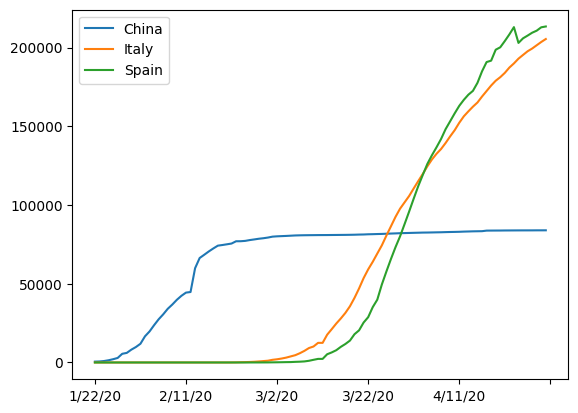

In [11]:
#Visualizing data related to a country for example China
import matplotlib.pyplot as plt
aggregating.loc["China"].plot()
aggregating.loc["Italy"].plot()
aggregating.loc["Spain"].plot()
plt.legend()

<Axes: >

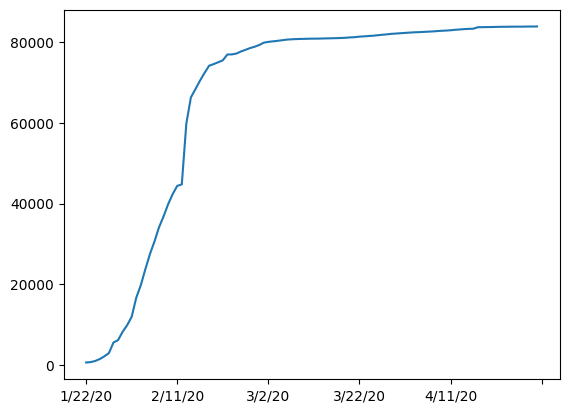

In [12]:
#Calculating a good measure
aggregating.loc['China'].plot()

<Axes: >

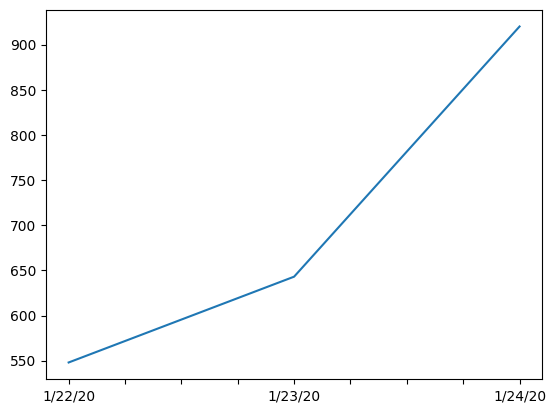

In [13]:
aggregating.loc['China'][:3].plot()

<Axes: >

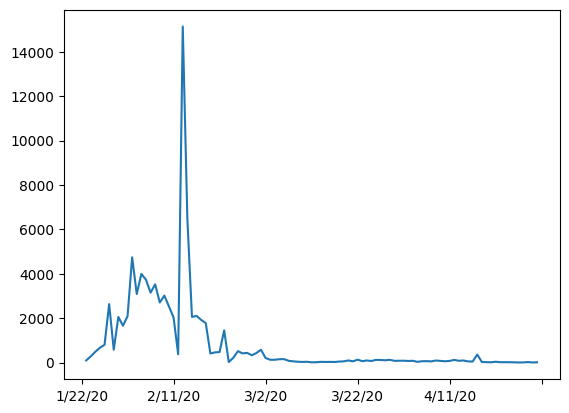

In [14]:
#caculating the first derivative of the curve
aggregating.loc['China'].diff().plot()

In [15]:
#find maxmimum infection rate for China
aggregating.loc['China'].diff().max()

15136.0

In [16]:
aggregating.loc['Italy'].diff().max()

6557.0

In [17]:
aggregating.loc['Spain'].diff().max()

9630.0

In [20]:
countries=list(aggregating.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(aggregating.loc[c].diff().max())
aggregating["max_infection_rates"]=max_infection_rates
aggregating.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [21]:
data=pd.DataFrame(aggregating["max_infection_rates"])

In [22]:
data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [2]:
import pandas as pd
happiness=pd.read_csv("/content/drive/MyDrive/ML PROJECT/worldwide_happiness_report.csv")
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
#let's drop the useless columns
cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [5]:
happiness.drop(cols,axis=1,inplace=True)
happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [6]:
#changing the indices of the dataframe
happiness.set_index("Country or region",inplace=True)
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [1]:
#now let's join two dataset we have prepared
#Corona Dataset :
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/ML PROJECT/covid19_deaths_dataset.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
#now let's join two dataset we have prepared
#Corona Dataset
data.head()

In [ ]:
#wolrd happiness report Dataset
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [8]:
final=data.join(happiness,how="inner")
final.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,64,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,450,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,42,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
final.corr()


<ipython-input-5-4fee8eca12fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final.corr()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/29/20,4/30/20,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Lat,1.000000,-0.175742,0.025455,0.028539,0.030958,0.028770,0.029179,0.028568,0.027351,0.027824,...,0.125461,0.124446,0.140215,-0.156310,-0.101774,-0.037923,-0.049105,-0.040682,-0.016090,-0.173320
Long,-0.175742,1.000000,0.085103,0.090231,0.092951,0.089851,0.092245,0.092267,0.089469,0.090759,...,-0.060568,-0.062073,-0.064150,0.066444,0.096237,0.051998,0.078796,0.034219,-0.052140,0.108533
1/22/20,0.025455,0.085103,1.000000,0.998273,0.998278,0.999379,0.999275,0.999497,0.999814,0.999691,...,0.101637,0.100038,-0.027647,0.024317,-0.010143,0.071691,0.017225,0.068287,-0.000716,-0.026085
1/23/20,0.028539,0.090231,0.998273,1.000000,0.998983,0.999112,0.998657,0.998519,0.998542,0.998413,...,0.100574,0.098971,-0.029652,0.026210,-0.013256,0.072025,0.019211,0.071976,0.002324,-0.027682
1/24/20,0.030958,0.092951,0.998278,0.998983,1.000000,0.999725,0.999123,0.998836,0.998737,0.998605,...,0.100212,0.098606,-0.030435,0.026863,-0.010091,0.075265,0.018680,0.071292,0.000070,-0.027728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Social support,-0.037923,0.051998,0.071691,0.072025,0.075265,0.073867,0.073662,0.074187,0.073217,0.073631,...,-0.083864,-0.083804,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.049105,0.078796,0.017225,0.019211,0.018680,0.018106,0.018987,0.020385,0.019148,0.019240,...,-0.054578,-0.054265,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.040682,0.034219,0.068287,0.071976,0.071292,0.070120,0.069934,0.070556,0.069675,0.070677,...,0.008892,0.009699,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.016090,-0.052140,-0.000716,0.002324,0.000070,-0.000244,-0.002202,-0.003499,-0.002409,-0.003219,...,0.109930,0.110472,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538


In [6]:
#Visualization of the results
final.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,64,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,450,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,42,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
